# Khám phá dữ liệu - Amazon Beauty (Ratings)

Notebook này khám phá bộ dữ liệu ratings để hiểu:
- Cấu trúc và chất lượng dữ liệu
- Phân phối ratings và xu hướng
- Hành vi người dùng
- Sản phẩm phổ biến
- Mẫu thời gian


## 1. Setup and Data Loading


In [ ]:
import sys
import os
from datetime import datetime

sys.path.insert(0, os.path.abspath('../src'))

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from data_processing import DataProcessor

np.random.seed(42)
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['figure.dpi'] = 100


In [ ]:
dp = DataProcessor().load_and_extract('../data/raw/ratings_Beauty.csv')
data = dp.data
header = ['UserId', 'ProductId', 'Rating', 'Timestamp']
print(f"Dữ liệu: {data.shape}")
print(f"Các cột: {header}")


Dữ liệu: (2023070,)
Các cột: ['UserId', 'ProductId', 'Rating', 'Timestamp']


## 2. Data Overview and Quality Check


In [3]:
stats = get_basic_stats(data)
print(f"Tổng hàng: {stats['total_rows']:,}")
print(f"Tổng cột: {stats['total_columns']}")
print(f"Bộ nhớ: {stats['memory_mb']:.2f} MB")
for col, count in stats['unique_counts'].items():
    print(f"{col}: {count:,}")


Tổng hàng: 2,023,070
Tổng cột: 4
Bộ nhớ: 262.39 MB
UserId: 1,210,271
ProductId: 249,274
Rating: 5
Timestamp: 4,231


In [4]:
validation = validate_data(data)
print(f"Tổng giá trị null: {validation['total_nulls']}")
print(f"Tỷ lệ null: {validation['null_percentage']:.2f}%")
for col, count in validation['null_counts'].items():
    print(f"{col}: {count}")


Tổng giá trị null: 0
Tỷ lệ null: 0.00%
Rating: 0
Timestamp: 0


## 3. Rating Distribution Analysis


In [5]:
ratings = data['Rating']
unique_ratings, counts = np.unique(ratings, return_counts=True)
for rating, count in zip(unique_ratings, counts):
    percentage = (count / len(ratings)) * 100
    print(f"{rating:.1f} sao: {count:,} ({percentage:.2f}%)")
print(f"Trung bình: {np.mean(ratings):.4f}")
print(f"Trung vị: {np.median(ratings):.4f}")
print(f"Độ lệch chuẩn: {np.std(ratings):.4f}")


1.0 sao: 183,784 (9.08%)
2.0 sao: 113,034 (5.59%)
3.0 sao: 169,791 (8.39%)
4.0 sao: 307,740 (15.21%)
5.0 sao: 1,248,721 (61.72%)
Trung bình: 4.1490
Trung vị: 5.0000
Độ lệch chuẩn: 1.3115
Độ lệch chuẩn: 1.3115


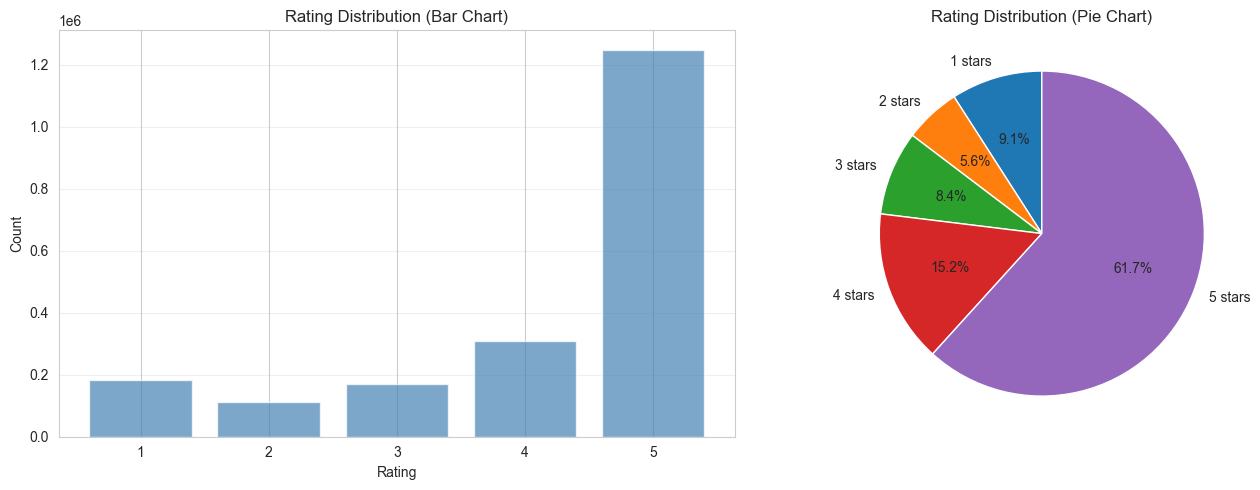

In [6]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

ax1.bar(unique_ratings, counts, color='steelblue', alpha=0.7)
ax1.set_xlabel('Rating')
ax1.set_ylabel('Count')
ax1.set_title('Rating Distribution (Bar Chart)')
ax1.set_xticks([1, 2, 3, 4, 5])
ax1.grid(axis='y', alpha=0.3)

ax2.pie(counts, labels=[f"{r:.0f} stars" for r in unique_ratings], autopct='%1.1f%%', startangle=90)
ax2.set_title('Rating Distribution (Pie Chart)')

plt.tight_layout()
plt.show()


# Khám phá dữ liệu - Hệ khuyến nghị Amazon Beauty

**Dataset**: Amazon Ratings (Beauty Products)  
**Kích thước**: ≈2M ratings  
**Mục tiêu**: Khám phá đặc tính dữ liệu và chuẩn bị cho hệ khuyến nghị

## Nội dung
1. Tải dữ liệu bằng NumPy
2. Thống kê cơ bản và kiểm tra chất lượng
3. Phân tích phân phối ratings
4. Phân tích người dùng và sản phẩm
5. Phân tích theo thời gian
6. Khảo sát sparsity


## 1. Tải dữ liệu với NumPy

Dùng `np.genfromtxt()` để tải CSV (không dùng pandas).


In [ ]:
data_path = '../data/raw/ratings_Beauty.csv'
dp = DataProcessor().load_and_extract(data_path)
data = dp.data
header = ['UserId', 'ProductId', 'Rating', 'Timestamp']
print(f"Tổng bản ghi: {len(data):,}")
print(f"Kích thước: {data.shape}")


Tổng bản ghi: 2,023,070
Kích thước: (2023070,)


## 2. Data Quality Check

Check for missing values and data validity using NumPy operations.


In [8]:
ratings = data['Rating']
timestamps = data['Timestamp']

print(f"Null ở Rating: {np.sum(np.isnan(ratings))}")
print(f"Khoảng rating: [{np.min(ratings):.1f}, {np.max(ratings):.1f}]")
print(f"Trung bình rating: {np.mean(ratings):.3f}")
print(f"Độ lệch chuẩn: {np.std(ratings):.3f}")
print(f"Trung vị rating: {np.median(ratings):.1f}")

print(f"Người dùng khác nhau: {len(np.unique(data['UserId'])):,}")
print(f"Sản phẩm khác nhau: {len(np.unique(data['ProductId'])):,}")
unique_ratings, counts = np.unique(ratings, return_counts=True)
for rating, count in zip(unique_ratings, counts):
    percentage = (count / len(ratings)) * 100
    print(f"{rating:.1f} sao: {count:,} ({percentage:.2f}%)")


Null ở Rating: 0
Khoảng rating: [1.0, 5.0]
Trung bình rating: 4.149
Độ lệch chuẩn: 1.312
Trung vị rating: 5.0
Người dùng khác nhau: 1,210,271
Sản phẩm khác nhau: 249,274
Người dùng khác nhau: 1,210,271
Sản phẩm khác nhau: 249,274
1.0 sao: 183,784 (9.08%)
2.0 sao: 113,034 (5.59%)
3.0 sao: 169,791 (8.39%)
4.0 sao: 307,740 (15.21%)
5.0 sao: 1,248,721 (61.72%)
1.0 sao: 183,784 (9.08%)
2.0 sao: 113,034 (5.59%)
3.0 sao: 169,791 (8.39%)
4.0 sao: 307,740 (15.21%)
5.0 sao: 1,248,721 (61.72%)


## 3. Rating Distribution Visualization


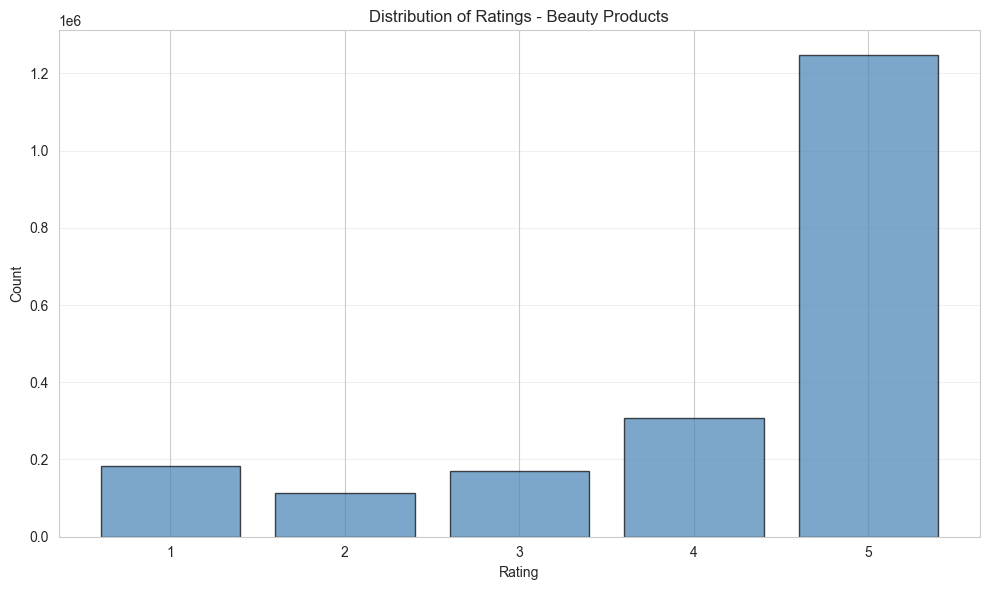

Quan sát chính:
- Phân phối lệch về 5 sao
- Có thiên vị tích cực trong feedback
- Đây là hiện tượng phổ biến trong e-commerce


In [9]:
fig, ax = plt.subplots(figsize=(10, 6))
unique_ratings, counts = np.unique(ratings, return_counts=True)
ax.bar(unique_ratings, counts, color='steelblue', alpha=0.7, edgecolor='black')
ax.set_xlabel('Rating')
ax.set_ylabel('Count')
ax.set_title('Distribution of Ratings - Beauty Products')
ax.set_xticks([1, 2, 3, 4, 5])
ax.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print("Quan sát chính:")
print("- Phân phối lệch về 5 sao")
print("- Có thiên vị tích cực trong feedback")
print("- Đây là hiện tượng phổ biến trong e-commerce")


## 4. Product Popularity Analysis

Identify most popular products based on number of ratings.


In [10]:
product_ids = data['ProductId']
unique_products, product_counts = np.unique(product_ids, return_counts=True)

sorted_idx = np.argsort(product_counts)[::-1]
top_20_products = unique_products[sorted_idx[:20]]
top_20_counts = product_counts[sorted_idx[:20]]

for i, (prod_id, count) in enumerate(zip(top_20_products, top_20_counts), 1):
    print(f"{i:2d}. Product {prod_id}: {count:,}")

print(f"Thống kê ratings/product:")
print(f"- Trung bình: {np.mean(product_counts):.2f}")
print(f"- Trung vị: {np.median(product_counts):.0f}")
print(f"- Tối đa: {np.max(product_counts):,}")
print(f"- Số product chỉ có 1 rating: {np.sum(product_counts == 1):,}")


 1. Product B001MA0QY2: 7,533
 2. Product B0009V1YR8: 2,869
 3. Product B0043OYFKU: 2,477
 4. Product B0000YUXI0: 2,143
 5. Product B003V265QW: 2,088
 6. Product B000ZMBSPE: 2,041
 7. Product B003BQ6QXK: 1,918
 8. Product B004OHQR1Q: 1,885
 9. Product B00121UVU0: 1,838
10. Product B000FS05VG: 1,589
11. Product B000142FVW: 1,558
12. Product B0046VGPHQ: 1,475
13. Product B001JKTTVQ: 1,468
14. Product B004INUWX0: 1,430
15. Product B000TKH6G2: 1,379
16. Product B00150LT40: 1,349
17. Product B0048O2R1E: 1,349
18. Product B003S516XO: 1,347
19. Product B00188IFHS: 1,341
20. Product B0056GDG90: 1,333
Thống kê ratings/product:
- Trung bình: 8.12
- Trung vị: 2
- Tối đa: 7,533
- Số product chỉ có 1 rating: 103,484


## 5. User Activity Analysis

Analyze user behavior and engagement patterns.


In [11]:
user_ids = data['UserId']
unique_users, user_counts = np.unique(user_ids, return_counts=True)

print(f"Người dùng khác nhau: {len(unique_users):,}")
print(f"Trung bình ratings/người: {np.mean(user_counts):.2f}")
print(f"Trung vị ratings/người: {np.median(user_counts):.0f}")
print(f"Max ratings bởi 1 user: {np.max(user_counts):,}")
print(f"Min ratings bởi 1 user: {np.min(user_counts):,}")

percentiles = [25, 50, 75, 90, 95, 99]
for p in percentiles:
    val = np.percentile(user_counts, p)
    print(f"{p}th percentile: {val:.0f} ratings")

power_users = np.sum(user_counts >= 10)
casual_users = np.sum(user_counts < 5)
print(f"Power users (≥10 ratings): {power_users:,} ({power_users/len(unique_users)*100:.1f}%)")
print(f"Casual users (<5 ratings): {casual_users:,} ({casual_users/len(unique_users)*100:.1f}%)")


Người dùng khác nhau: 1,210,271
Trung bình ratings/người: 1.67
Trung vị ratings/người: 1
Max ratings bởi 1 user: 389
Min ratings bởi 1 user: 1
25th percentile: 1 ratings
50th percentile: 1 ratings
75th percentile: 2 ratings
90th percentile: 3 ratings
95th percentile: 4 ratings
99th percentile: 10 ratings
Power users (≥10 ratings): 12,595 (1.0%)
Casual users (<5 ratings): 1,157,897 (95.7%)


## 6. Temporal Analysis

Explore temporal patterns in the dataset using timestamps.


Dải ngày: 1998-10-19 → 2014-07-23
Khoảng thời gian: 15.8 năm


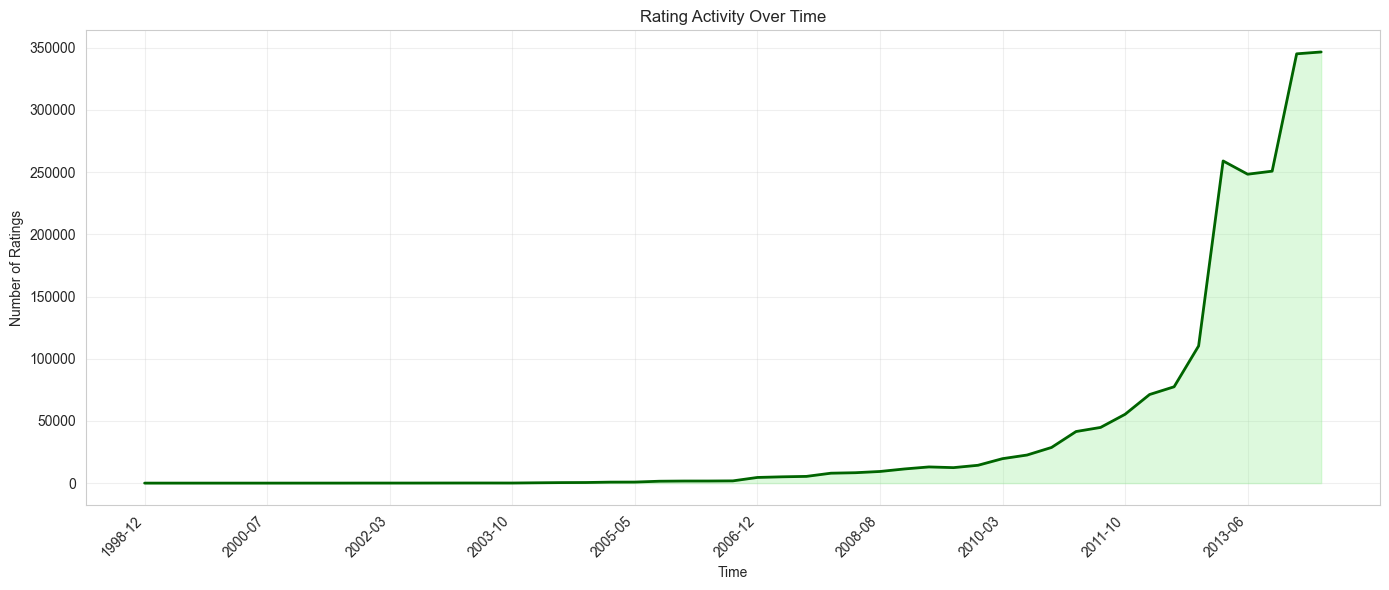

In [12]:
timestamps_sorted = np.sort(timestamps)
min_ts = timestamps_sorted[0]
max_ts = timestamps_sorted[-1]

min_date = datetime.fromtimestamp(min_ts).strftime('%Y-%m-%d')
max_date = datetime.fromtimestamp(max_ts).strftime('%Y-%m-%d')

print(f"Dải ngày: {min_date} → {max_date}")
print(f"Khoảng thời gian: {(max_ts - min_ts) / (365.25 * 24 * 3600):.1f} năm")

bins = np.linspace(min_ts, max_ts, 50)
counts, _ = np.histogram(timestamps, bins=bins)
bin_centers = (bins[:-1] + bins[1:]) / 2

dates = [datetime.fromtimestamp(ts).strftime('%Y-%m') for ts in bin_centers[::5]]

plt.figure(figsize=(14, 6))
plt.plot(bin_centers, counts, linewidth=2, color='darkgreen')
plt.fill_between(bin_centers, counts, alpha=0.3, color='lightgreen')
plt.xlabel('Time')
plt.ylabel('Number of Ratings')
plt.title('Rating Activity Over Time')
plt.xticks(bin_centers[::5], dates, rotation=45, ha='right')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


## 7. Data Sparsity Analysis

Calculate the sparsity of the user-item matrix to understand the challenge.


In [13]:
n_users = len(unique_users)
n_products = len(unique_products)
n_ratings = len(data)

total_possible_ratings = n_users * n_products
sparsity = 1 - (n_ratings / total_possible_ratings)

print(f"Người dùng: {n_users:,}")
print(f"Sản phẩm: {n_products:,}")
print(f"Tổng khả thi: {total_possible_ratings:,}")
print(f"Thực tế: {n_ratings:,}")
print(f"Sparsity: {sparsity:.6f} ({sparsity*100:.4f}%)")

print("Kết luận:")
print("- Ma trận rất thưa")
print("- Cần giảm chiều (SVD/MF) và lọc dữ liệu")


Người dùng: 1,210,271
Sản phẩm: 249,274
Tổng khả thi: 301,689,093,254
Thực tế: 2,023,070
Sparsity: 0.999993 (99.9993%)
Kết luận:
- Ma trận rất thưa
- Cần giảm chiều (SVD/MF) và lọc dữ liệu


In [14]:
# Lưu outputs để các notebook sau tận dụng
np.savez_compressed('../data/processed/exploration_outputs.npz',
                    ratings=ratings,
                    timestamps=timestamps,
                    unique_users=unique_users,
                    unique_products=unique_products,
                    user_counts=user_counts,
                    product_counts=product_counts,
                    data_shape=data.shape)
print(f"Saved outputs to: ../data/processed/exploration_outputs.npz")


Saved outputs to: ../data/processed/exploration_outputs.npz
